# Linear Regression Assignment

# Importing necessary libraries and adjusting display settings

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

In [5]:
import matplotlib
import statsmodels
import sklearn

In [8]:
print('pandas version: ', pd.__version__)
print('numpy version: ', np.__version__)
print('matplotlib version: ', matplotlib.__version__)
print('statsmodels version: ', statsmodels.__version__)
print('sklearn version: ', sklearn.__version__)
print('seaborn version: ', sb.__version__)

pandas version:  1.0.3
numpy version:  1.19.2
matplotlib version:  3.1.3
statsmodels version:  0.11.0
sklearn version:  0.23.1
seaborn version:  0.11.0


In [2]:
# To display all results of a single cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Setting display options

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

# Importing dataset

In [5]:
# Reading csv data

bikes = pd.read_csv('day.csv')

In [6]:
# For getting overview of the data

bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Checking structure of data

In [6]:
# To check rows and columns of the dataset

bikes.shape

(730, 16)

In [7]:
# To Check for dtype

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# For getting statistical information about the data
# The resultant datafarme looks good, no anomalies found

bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data quality check and missing values

- **Number of missing values in all columns**

In [9]:
# There are no null values

bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- **Number of unique categories in each variable**

In [10]:
# Checking for categories in each variable

bikes.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [11]:
# Checking for value counts each category in a variable

bikes.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [12]:
# Checking for value counts each category in a variable

bikes.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [13]:
# Checking for value counts each category in a variable

bikes.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [14]:
# Checking for value counts each category in a variable

bikes.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

- **Removing unnecessary columns**

In [15]:
# We can these variable as they are not necessary for model building

bikes.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [16]:
# Checking head() after removing the columns

bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
# Checking shape after changes

bikes.shape

(730, 12)

- **Checking datatypes and changing datatypes**

In [18]:
bikes.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

- ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit'] are Categorical variables
- ['yr','holiday','workingday'] are binary variable so we can keep them as is
- ['season','mnth','weekday','weathersit'] have more than 2 categories, their data type is 'int64' but they are categorical variables, so need to convert them to object type

In [19]:
# Creating categories in variable 'season'

# season:
#     1 == spring
#     2 == summer 
#     3 == fall
#     4 == winter

bikes['season'] = bikes[['season']].apply(lambda x: x.map({1:'spring',2:'summer',
                                                           3:'fall',4:'winter'}))

In [20]:
# Creating categories in  variable 'weathersit'

# weathersit : 
#     1 == Clear, Few clouds, Partly cloudy, Partly cloudy
#     2 == Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#     3 == Light Snow, Light Rain + Thunderstorm + Scattered clouds, 
#          Light Rain + Scattered clouds
#     4 == Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

bikes['weathersit'] = bikes[['weathersit']].apply(lambda x: x.map({1:'Clear',
                                                                2:'Mist_Cloudy',
                                                                3:'LightRain_LightSnow'}))

- Category '1' was named 'Clear'
- Category '2' was named 'Mist_Cloudy'
- Category '3' was named 'LightRain_LightSnow'

In [21]:
# Creating categories in  variable 'mnth'
# Renaming months as Jan, Feb, Mar and so on

bikes['mnth'] = bikes[['mnth']].apply(lambda x: x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',
                                                       5:'May',6:'Jun',7:'Jul',8:'Aug',
                                                      9:'Sep',10:'Oct',11:'Nov',12:'Dec'}))

- Mapped the numbers to their respective months

In [22]:
# Creating categories in  variable 'weekday'

bikes['weekday'] = bikes[['weekday']].apply(lambda x: x.map({0:'Sun',1:'Mon',2:'Tue',
                                                             3:'Wed',4:'Thur',5:'Fri',
                                                             6:'Sat'}))

- Mapped the categories to the following:
    '0' as 'Sun', '1' as 'Mon', '2' as 'Tue',
    '3' as 'Wed', '4' as 'Thur', '5' as 'Fri', '6' as 'Sat'

In [23]:
# Checking head() after modification

bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# Analysis of data

 - **Categorical variables**

In [25]:
bikes.groupby('weekday')['cnt'].sum().sort_values(ascending=False)

weekday
Fri     487790
Thur    485395
Sat     477807
Wed     471214
Tue     469109
Mon     455503
Sun     444027
Name: cnt, dtype: int64

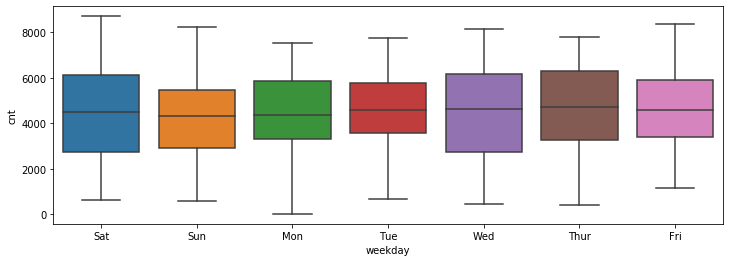

In [26]:
plt.figure(figsize=(12,4))
sb.boxplot(x='weekday',y='cnt',data=bikes)
plt.show();

- There are no outliers for any of the days
- Rental counts were highest for 'Fri' followed by 'Thur'
- Even though rental counts were more for 'Fri', from the boxplot we can see that the spread is less, that means throughout the two years the rental counts were consistent for 'Fri'
- 'Sun' has the lowest rental count
- 'Sat' and 'Wed' have more spread in rental counts, it seems throughout the two years the rental counts fluctuated for 'sat' and 'Wed'

In [27]:
# Performing groupby for 'season' variable and to check Rental count

bikes.groupby('season')['cnt'].sum().sort_values(ascending=False)

season
fall      1061129
summer     918589
winter     841613
spring     469514
Name: cnt, dtype: int64

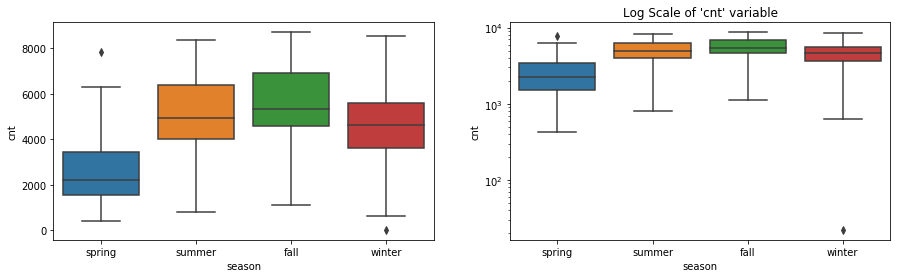

In [28]:
plt.figure(figsize=(15,4))
plt.subplot(121)
sb.boxplot(x='season',y='cnt',data=bikes)

plt.subplot(122)
sb.boxplot(x='season',y='cnt',data=bikes)
plt.yscale('log')
plt.title("Log Scale of 'cnt' variable")
plt.show();

- From the above two graphs we can see that 'fall' has highest meadian value for Rental count,followed by 'summer'
- 'spring' has the lowest median value for Rental count, even though it has one outlier around 8000 mark, but total Rental count is the least
- 'winter' has one outlier and it is below 100 mark, it has recorded very less Rental count in one of the months

In [29]:
# Performing groupby for 'weathersit' variable and to check Rental count

bikes.groupby('weathersit')['cnt'].sum().sort_values(ascending=False)

weathersit
Clear                  2257952
Mist_Cloudy             995024
LightRain_LightSnow      37869
Name: cnt, dtype: int64

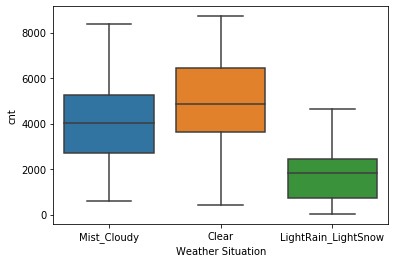

In [30]:
sb.boxplot(x='weathersit',y='cnt',data=bikes)
plt.xlabel('Weather Situation')
plt.show();

- We can see median rental counts and total Rental counts were more for weather 'Clear '
- Median Rental count and Rental counts were least for weather 'LightRain_LightSnow'
- There are no outliers

In [31]:
# Performing groupby for 'mnth' variable and to check Rental count

bikes.groupby('mnth')['cnt'].sum().sort_values(ascending=False)

mnth
Aug    351194
Jun    346342
Sep    345991
Jul    344948
May    331686
Oct    322352
Apr    269094
Nov    254831
Mar    228920
Dec    211036
Feb    149518
Jan    134933
Name: cnt, dtype: int64

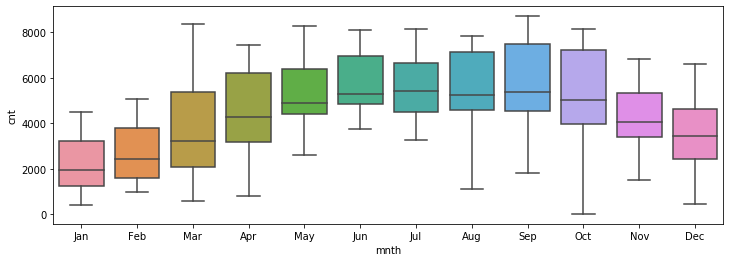

In [32]:
plt.figure(figsize=(12,4))
sb.boxplot(x='mnth',y='cnt',data=bikes)
plt.show();

- Even though 'sep' has highest median value for Rental count, total Rental count is more for 'Aug'
- 'Jan' has the least median Rental count and total Rental count
- We can see the pattern here, Rental count increased from 'Jan' to 'Jun', then it was stable between 'Jun' and "sep", then again declined
- It means period between 'Jun' and 'Sep' Rental counts were more and that the period is important

In [33]:
# Checking Rental count for 'holiday'

bikes.groupby('holiday')['cnt'].sum()

holiday
0    3212410
1      78435
Name: cnt, dtype: int64

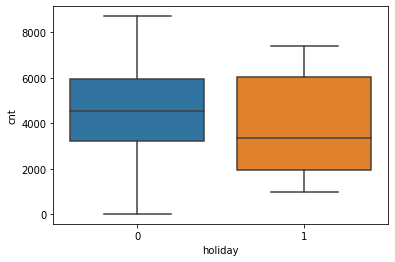

In [34]:
sb.boxplot(x='holiday',y='cnt',data=bikes)
plt.show();

- No outliers for both '0' and '1'
- Number of Rental counts is more for '0' i.e not holiday
- Median is higher for '0', spread is equal above and below median
- The spread of datapoints is more for '1' i.e holiday 

- **Numerical variables**

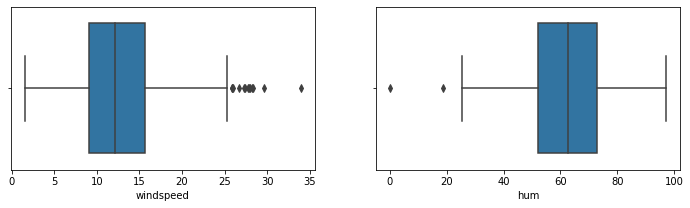

In [35]:
# Plotting 'windspeed' and 'hum'

plt.figure(figsize=(12,3))
plt.subplot(121)
sb.boxplot(x='windspeed', data=bikes)

plt.subplot(122)
sb.boxplot(x='hum', data=bikes)
plt.show();

- There are outliers in 'windspeed' variable
- However windspeed can be very high sometimes so outliers look genuine
- There are more data points in the 'Inter Quartile Range' i.e between 1st quartile and 3rd quartile

- There are outliers in 'hum' variable
- However windspeed can be low sometimes so outliers look genuine
- There are more data points in the 'Inter Quartile Range' i.e between 1st quartile and 3rd quartile 

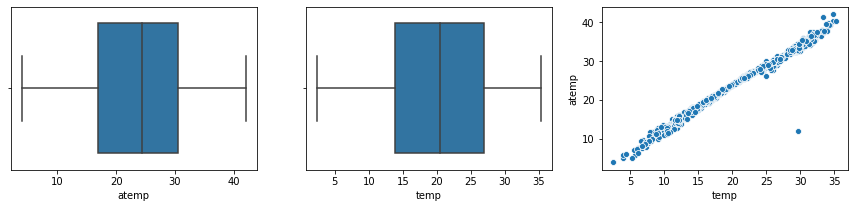

In [36]:
# Plotting 'atemp' and 'temp'


plt.figure(figsize=(15,3))
plt.subplot(131)
sb.boxplot(x='atemp', data=bikes)

plt.subplot(132)
sb.boxplot(x='temp', data=bikes)

plt.subplot(133)
sb.scatterplot(x='temp',y='atemp', data=bikes)
plt.show();

- If we see the boxplot there are no outliers in both the variables 'temp' and 'atemp'
- But when we do a scatterplot then we can see an outlier in 'temp' variable at around 30
- In the scatterplot we can see that both the variables have strong positive correlation - multicollinearity

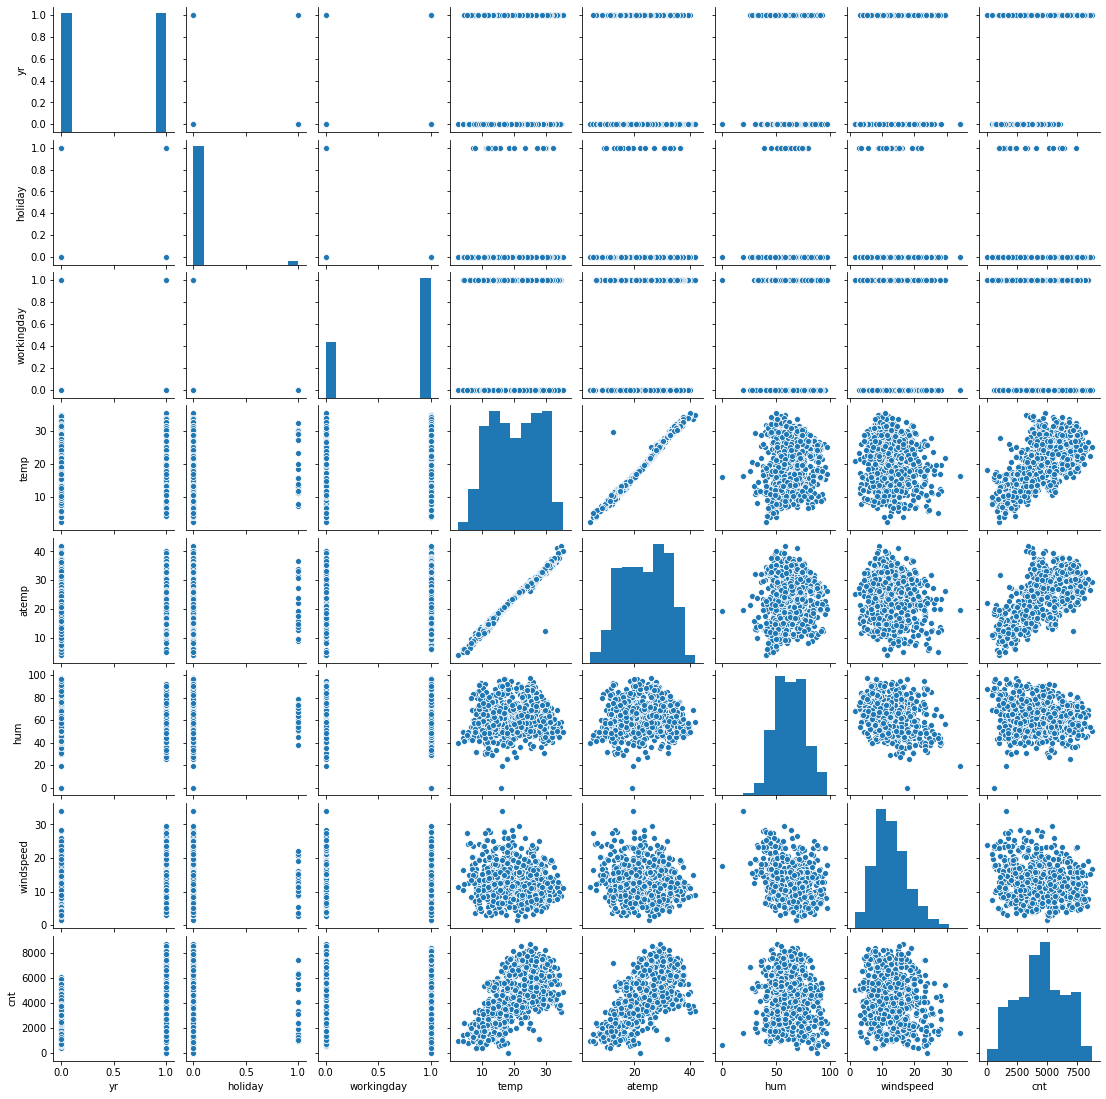

In [37]:
# Plotting Pairplot

graph = sb.pairplot(bikes)
graph.fig.set_size_inches(15,15)
plt.show();

- 'cnt' variable has positive correlation with ['temp', 'atemp'] variables
- There is periodic relationship between 'cnt' and 'mnth'
- Rental count is more when 'hum' is above 50 and 'windspeed' is below 20
- 'yr'==1 i.e year 2019 has more Rental count
- 'holiday'==0 has more Rental counts
- variable 'temp' has strong positive correlation with 'atemp'

- **Correlation for numerical variable and highest correlation**

In [38]:
# Creating a correlation table

corr=bikes.corr().where(np.triu(np.ones(bikes.corr().shape),k=1).astype(bool)).unstack()\
                                                                          .reset_index()
corr.rename(columns={'level_0':'Var1','level_1':'Var2',0:'corr_1'},inplace=True)
corr.dropna(subset=['corr_1'],inplace=True)
corr['corr_1']=round(corr['corr_1'],4)
corr['corr_1_abs']=corr['corr_1'].abs()
corr.sort_values(by='corr_1_abs',inplace=True,ascending=False)
corr.head(30)

,Var1,Var2,corr_1,corr_1_abs
35,atemp,temp,0.9917,0.9917
60,cnt,atemp,0.6307,0.6307
59,cnt,temp,0.6270,0.6270
56,cnt,yr,0.5697,0.5697
17,workingday,holiday,-0.2529,0.2529
53,windspeed,hum,-0.2485,0.2485
62,cnt,windspeed,-0.2351,0.2351
52,windspeed,atemp,-0.1839,0.1839
51,windspeed,temp,-0.1582,0.1582
44,hum,atemp,0.1415,0.1415


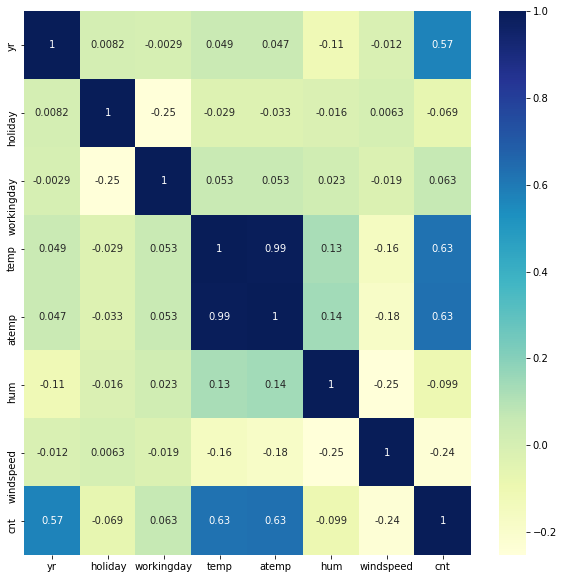

In [39]:
# Checking for correlation using Heatmap

plt.figure(figsize=(10,10))
sb.heatmap(bikes.corr(), annot = True, cmap='YlGnBu')
plt.show();

- 'cnt' variable has positive correlation of around 0.57 with 'yr'
- 'cnt' variable has positive correlation of around 0.63 with both 'temp' and 'atemp'
- 'cnt' variable has negative correlation of around -0.24 with 'windspeed'
- 'cnt' variable has very low correlation with ['holiday','workingday','hum']
- 'windspeed' and 'hum' has negative correlation of around -0.25
- 'holiday' and 'workingday' has negative correlation of around -0.25
- 'atemp' and 'temp' have very high correlation - multicollinearity

# Preparing data for modelling

In [40]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


- **Creating Dummy variables**

In [41]:
# Creating dummy variables for ['season','weathersit','mnth','weekday']

dummies = pd.get_dummies(bikes[['season','weathersit','mnth','weekday']], drop_first=True)
dummies.head(7)

,season_spring,season_summer,season_winter,weathersit_LightRain_LightSnow,weathersit_Mist_Cloudy,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed
0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
# Concating dataframes of 'bikes' and 'season' and also checking data after modofocations

bikes = pd.concat([bikes,dummies],axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_LightRain_LightSnow,weathersit_Mist_Cloudy,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed
0,spring,0,Jan,0,Sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,spring,0,Jan,0,Sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
# Checking the shape of t
bikes.shape

(730, 34)

In [44]:
# Since we created dummy variables for ['season','weathersit'] variables we can drop-
# these variables from dataset

bikes.drop(['season','weathersit','mnth','weekday'],axis=1,inplace=True)
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_LightRain_LightSnow,weathersit_Mist_Cloudy,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
# Checking shape after creating dummy variables

bikes.shape

(730, 30)

In [46]:
# Renaming the variables in the bikes dataframe

bikes.rename(columns={'season_spring':'spring', 'season_summer':'summer',
                      'season_winter':'winter', 
                      'weathersit_LightRain_LightSnow':'LightRain_LightSnow', 
                      'weathersit_Mist_Cloudy':'Mist_Cloudy', 'mnth_Aug':'Aug',
                      'mnth_Dec':'Dec','mnth_Feb':'Feb','mnth_Jan':'Jan',
                      'mnth_Jul':'Jul','mnth_Jun':'Jun','mnth_Mar':'Mar',
                      'mnth_May':'May','mnth_Nov':'Nov','mnth_Oct':'Oct',
                      'mnth_Sep':'Sep','weekday_Mon':'Mon','weekday_Sat':'Sat',
                      'weekday_Sun':'Sun','weekday_Thur':'Thur','weekday_Tue':'Tue',
                      'weekday_Wed':'Wed'},inplace=True)

In [47]:
# Checking head of the dataframe after renaming the variables

bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,LightRain_LightSnow,Mist_Cloudy,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


### Splitting dataset into Train and Test set

In [48]:
# Dividing bikes dataset in to X, y dataset

X = bikes.drop('cnt',axis=1)
y = bikes['cnt']

In [49]:
# Checking the shape of resultant datasets

X.shape, y.shape

((730, 29), (730,))

In [50]:
# Splitting the X and y datasets into Train sets and Test sets

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=3)

In [51]:
# Checking the shape of resultant datasets

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((511, 29), (219, 29), (511,), (219,))

In [52]:
# Checking head() of X_train

X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,LightRain_LightSnow,Mist_Cloudy,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
336,0,0,0,12.265847,15.53020,61.2917,6.417481,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
270,0,0,1,26.035000,28.75790,84.8750,9.958143,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
121,0,0,1,22.515847,26.64165,73.0000,12.291418,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
238,0,0,0,27.880000,31.77780,85.0000,25.166339,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
592,1,0,1,29.485847,32.73440,51.9167,9.500332,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [53]:
# Checking head() of 'y'

y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

# Scaling the dataset

In [54]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'LightRain_LightSnow', 'Mist_Cloudy',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed'],
      dtype='object')

In [55]:
X_train.shape

(511, 29)

In [56]:
# Creating a copy of both train set and test set to avoid 'SettingwithCopy' 
# warning while scaling

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [57]:
# Performing Min Max scaling 'X_train'

scale_vars=['temp', 'atemp', 'hum','windspeed']

scaler = MinMaxScaler()
X_train_scaled[scale_vars] = scaler.fit_transform(X_train_scaled[scale_vars])

In [58]:
X_train_scaled.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,LightRain_LightSnow,Mist_Cloudy,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
336,0,0,0,0.303830,0.303920,0.630249,0.151301,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
270,0,0,1,0.728915,0.651183,0.872751,0.260245,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
121,0,0,1,0.620271,0.595626,0.750643,0.332038,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
238,0,0,0,0.785874,0.730464,0.874036,0.728193,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
592,1,0,1,0.835451,0.755577,0.533848,0.246158,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Selecting Top 15 features for the model

In [59]:
lm = LinearRegression()
lm.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
selector = RFE(lm,n_features_to_select=15)

In [61]:
selector = selector.fit(X_train_scaled,y_train)

In [62]:
features = list(zip(X_train_scaled.columns,selector.support_,selector.ranking_))
features = pd.DataFrame(features,columns=['Features','Support','Ranking'])
features_15 = features.loc[features['Support']==True,:]
features_15

,Features,Support,Ranking
0,yr,True,1
3,temp,True,1
4,atemp,True,1
5,hum,True,1
6,windspeed,True,1
7,spring,True,1
10,LightRain_LightSnow,True,1
11,Mist_Cloudy,True,1
16,Jul,True,1
18,Mar,True,1


In [63]:
features_15.Features.unique()

array(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'LightRain_LightSnow', 'Mist_Cloudy', 'Jul', 'Mar', 'May', 'Oct',
       'Sep', 'Mon', 'Sun'], dtype=object)

# Model Building

## Building 1st model with ['yr', 'temp', 'atemp', 'hum', 'windspeed', 'spring','LightRain_LightSnow', 'Mist_Cloudy', 'Jul', 'Mar', 'May', 'Oct','Sep', 'Mon', 'Sun']

In [64]:
X_train_scaled = X_train_scaled[['yr', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'LightRain_LightSnow', 'Mist_Cloudy', 'Jul', 'Mar', 'May', 'Oct',
       'Sep', 'Mon', 'Sun']]

# add constant
X_train_plus = sm.add_constant(X_train_scaled)

# create first model
lr_sm = sm.OLS(y_train,X_train_plus)

# fit
lr_model_sm = lr_sm.fit()

# summary
lr_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     186.8
Date:                Thu, 10 Sep 2020   Prob (F-statistic):          1.17e-192
Time:                        14:14:45   Log-Likelihood:                -4115.7
No. Observations:                 511   AIC:                             8263.
Df Residuals:                     495   BIC:                             8331.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3654.4377    262.139     13.941      0.000    3139.395    4169.480
yr                   2019.4085     70.069     28.820      0.000    1881.739    2157.078
temp                -1162.1495   1924.081     -0.604      0.546   -4942.522    2618.223
atemp                4936.7552   2101.908      2.349      0.019     806.995    9066.516
hum                 -1684.7597    331.037     -5.089      0.000   -2335.171   -1034.348
windspeed           -1354.8343    239.241     -5.663      0.000   -1824.888    -884.780
spring              -1351.0548    108.122    -12.496      0.000   -1563.490   -1138.620
LightRain_LightSnow -2226.7753    248.153     -8.973      0.000   -2714.339   -1739.212
Mist_Cloudy          -455.3189     92.240     -4.936      0.000    -636.548    -274.090
Jul                  -347.2789    156.403     -2.220      0.027    -654.574     -39.984
Mar                   496.5096    132.524      3.747      0.000     236.130     756.889
May                   268.0903    136.904      1.958      0.051      -0.895     537.075
Oct                   703.5692    121.970      5.768      0.000     463.926     943.212
Sep                   668.5629    139.500      4.793      0.000     394.477     942.649
Mon                  -392.8193     98.244     -3.998      0.000    -585.846    -199.792
Sun                  -407.6919    102.901     -3.962      0.000    -609.869    -205.514
==============================================================================
Omnibus:                       94.931   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.404
Skew:                          -0.909   Prob(JB):                     1.27e-56
Kurtosis:                       5.964   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Create a dataframe that will contain all the variables and their respective vif
vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values,i)
              for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,atemp,1146.44
1,temp,1100.44
3,hum,17.63
4,windspeed,4.94
5,spring,2.20
7,Mist_Cloudy,2.16
0,yr,2.05
8,Jul,1.43
11,Oct,1.32
12,Sep,1.32


# Building 2nd model by dropping 'temp' variable with P-value of 0.546

In [66]:
# Removed 'temp' variable
X_train_scaled = X_train_scaled.drop('temp',axis=1)

# add constant
X_train_plus = sm.add_constant(X_train_scaled)

# create first model
lr_sm = sm.OLS(y_train,X_train_plus)

# fit
lr_model_sm = lr_sm.fit()

# summary
lr_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     200.3
Date:                Thu, 10 Sep 2020   Prob (F-statistic):          9.73e-194
Time:                        14:14:46   Log-Likelihood:                -4115.9
No. Observations:                 511   AIC:                             8262.
Df Residuals:                     496   BIC:                             8325.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3663.4434    261.547     14.007      0.000    3149.567    4177.320
yr                   2023.0114     69.770     28.995      0.000    1885.930    2160.093
atemp                3674.9705    232.078     15.835      0.000    3218.993    4130.948
hum                 -1660.9214    328.466     -5.057      0.000   -2306.277   -1015.565
windspeed           -1388.8698    232.362     -5.977      0.000   -1845.404    -932.335
spring              -1354.1823    107.929    -12.547      0.000   -1566.237   -1142.128
LightRain_LightSnow -2244.3241    246.289     -9.113      0.000   -2728.222   -1760.426
Mist_Cloudy          -459.5085     91.919     -4.999      0.000    -640.108    -278.909
Jul                  -355.3571    155.730     -2.282      0.023    -661.329     -49.385
Mar                   504.5476    131.770      3.829      0.000     245.651     763.444
May                   271.6987    136.686      1.988      0.047       3.143     540.254
Oct                   712.4648    121.000      5.888      0.000     474.729     950.201
Sep                   658.6539    138.444      4.758      0.000     386.646     930.662
Mon                  -390.1560     98.082     -3.978      0.000    -582.864    -197.448
Sun                  -404.7667    102.722     -3.940      0.000    -606.590    -202.944
==============================================================================
Omnibus:                       94.391   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.999
Skew:                          -0.904   Prob(JB):                     2.57e-56
Kurtosis:                       5.959   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Checking for VIF in the remaining variables

vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values,i) 
              for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,hum,16.56
1,atemp,11.94
3,windspeed,4.64
4,spring,2.20
6,Mist_Cloudy,2.14
0,yr,2.03
7,Jul,1.42
10,Oct,1.30
11,Sep,1.30
8,Mar,1.25


# Building 3rd model by dropping 'hum' variable with VIF of 16.56

In [68]:
# Removed 'hum' variable
X_train_scaled = X_train_scaled.drop('hum',axis=1)

# add constant
X_train_plus = sm.add_constant(X_train_scaled)

# create first model
lr_sm = sm.OLS(y_train,X_train_plus)

# fit
lr_model_sm = lr_sm.fit()

# summary
lr_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.7
Date:                Thu, 10 Sep 2020   Prob (F-statistic):          1.64e-189
Time:                        14:14:46   Log-Likelihood:                -4128.7
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     497   BIC:                             8345.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2651.5719    172.527     15.369      0.000    2312.600    2990.543
yr                   2070.2304     70.831     29.228      0.000    1931.066    2209.395
atemp                3517.9589    235.608     14.931      0.000    3055.049    3980.869
windspeed           -1017.4572    225.830     -4.505      0.000   -1461.157    -573.758
spring              -1346.5843    110.554    -12.180      0.000   -1563.795   -1129.373
LightRain_LightSnow -2745.7356    230.950    -11.889      0.000   -3199.495   -2291.976
Mist_Cloudy          -728.1058     76.850     -9.474      0.000    -879.096    -577.116
Jul                  -290.6421    158.993     -1.828      0.068    -603.024      21.740
Mar                   545.1139    134.738      4.046      0.000     280.389     809.839
May                   188.0001    138.993      1.353      0.177     -85.087     461.087
Oct                   635.1868    122.962      5.166      0.000     393.597     876.777
Sep                   551.1223    140.141      3.933      0.000     275.780     826.465
Mon                  -429.4835    100.161     -4.288      0.000    -626.275    -232.692
Sun                  -443.3536    104.939     -4.225      0.000    -649.533    -237.174
==============================================================================
Omnibus:                       94.068   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.079
Skew:                          -0.910   Prob(JB):                     1.35e-54
Kurtosis:                       5.887   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# Checking for VIF in the remaining variables

vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values,i) 
              for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,atemp,5.47
2,windspeed,4.46
0,yr,2.02
3,spring,1.81
5,Mist_Cloudy,1.51
6,Jul,1.38
10,Sep,1.28
7,Mar,1.24
8,May,1.23
9,Oct,1.22


# Building 4th model by dropping 'May' variable with P-value of 0.177

In [70]:
# Removed 'May' variable
X_train_scaled = X_train_scaled.drop('May',axis=1)

# add constant
X_train_plus = sm.add_constant(X_train_scaled)

# create first model
lr_sm = sm.OLS(y_train,X_train_plus)

# fit
lr_model_sm = lr_sm.fit()

# summary
lr_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.2
Date:                Thu, 10 Sep 2020   Prob (F-statistic):          2.69e-190
Time:                        14:14:46   Log-Likelihood:                -4129.7
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     498   BIC:                             8340.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2652.0080    172.670     15.359      0.000    2312.757    2991.259
yr                   2068.8633     70.883     29.187      0.000    1929.598    2208.129
atemp                3571.5986    232.439     15.366      0.000    3114.916    4028.282
windspeed           -1023.6356    225.972     -4.530      0.000   -1467.611    -579.660
spring              -1359.4238    110.237    -12.332      0.000   -1576.011   -1142.836
LightRain_LightSnow -2744.2395    231.140    -11.873      0.000   -3198.369   -2290.110
Mist_Cloudy          -722.5952     76.805     -9.408      0.000    -873.498    -571.693
Jul                  -334.4428    155.790     -2.147      0.032    -640.530     -28.356
Mar                   532.0042    134.500      3.955      0.000     267.746     796.262
Oct                   606.5552    121.227      5.003      0.000     368.375     844.735
Sep                   514.5564    137.624      3.739      0.000     244.162     784.951
Mon                  -427.9266    100.238     -4.269      0.000    -624.868    -230.986
Sun                  -437.2315    104.929     -4.167      0.000    -643.389    -231.074
==============================================================================
Omnibus:                       92.083   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.253
Skew:                          -0.899   Prob(JB):                     1.84e-52
Kurtosis:                       5.821   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# Checking for VIF in the remaining variables

vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values,i) 
              for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,atemp,5.07
2,windspeed,4.46
0,yr,2.02
3,spring,1.79
5,Mist_Cloudy,1.51
6,Jul,1.33
7,Mar,1.24
9,Sep,1.24
10,Mon,1.20
8,Oct,1.19


# Building 5th model by dropping 'Jul' variable
- Checking whether this has any big negative impact on the model

In [72]:
# Removed 'Jul' variable
X_train_scaled = X_train_scaled.drop('Jul',axis=1)

# add constant
X_train_plus = sm.add_constant(X_train_scaled)

# create first model
lr_sm = sm.OLS(y_train,X_train_plus)

# fit
lr_model_sm = lr_sm.fit()

# summary
lr_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     238.0
Date:                Thu, 10 Sep 2020   Prob (F-statistic):          1.67e-190
Time:                        14:14:46   Log-Likelihood:                -4132.0
No. Observations:                 511   AIC:                             8288.
Df Residuals:                     499   BIC:                             8339.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2704.0070    171.580     15.759      0.000    2366.899    3041.115
yr                   2082.8779     70.836     29.404      0.000    1943.704    2222.052
atemp                3386.1570    216.571     15.635      0.000    2960.654    3811.660
windspeed            -993.9590    226.363     -4.391      0.000   -1438.701    -549.217
spring              -1380.5530    110.193    -12.528      0.000   -1597.053   -1164.053
LightRain_LightSnow -2779.0342    231.403    -12.009      0.000   -3233.679   -2324.390
Mist_Cloudy          -718.3009     77.056     -9.322      0.000    -869.696    -566.906
Mar                   552.8299    134.634      4.106      0.000     288.310     817.350
Oct                   634.3896    120.967      5.244      0.000     396.722     872.057
Sep                   571.1873    135.559      4.214      0.000     304.850     837.524
Mon                  -433.3104    100.568     -4.309      0.000    -630.899    -235.721
Sun                  -444.7584    105.249     -4.226      0.000    -651.544    -237.973
==============================================================================
Omnibus:                       96.173   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.107
Skew:                          -0.939   Prob(JB):                     2.19e-54
Kurtosis:                       5.842   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- No big negative impact on the model after removing 'Jul' variable

In [73]:
# Checking for VIF in the remaining variables

vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values,i) 
              for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,windspeed,4.35
1,atemp,4.13
0,yr,1.99
3,spring,1.79
5,Mist_Cloudy,1.50
6,Mar,1.23
9,Mon,1.20
8,Sep,1.19
10,Sun,1.17
7,Oct,1.16


# Building 6th model by dropping 'Mar' variable
- Checking whether this has any big negative impact on the model

In [74]:
# Removed 'Mar' variable
X_train_scaled = X_train_scaled.drop('Mar',axis=1)

# add constant
X_train_plus = sm.add_constant(X_train_scaled)

# create first model
lr_sm = sm.OLS(y_train,X_train_plus)

# fit
lr_model_sm = lr_sm.fit()

# summary
lr_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     252.2
Date:                Thu, 10 Sep 2020   Prob (F-statistic):          3.97e-188
Time:                        14:14:47   Log-Likelihood:                -4140.5
No. Observations:                 511   AIC:                             8303.
Df Residuals:                     500   BIC:                             8350.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2678.8049    174.168     15.381      0.000    2336.613    3020.997
yr                   2080.0645     71.947     28.911      0.000    1938.708    2221.421
atemp                3448.5214    219.437     15.715      0.000    3017.388    3879.654
windspeed            -947.8458    229.642     -4.127      0.000   -1399.028    -496.664
spring              -1262.9844    108.083    -11.685      0.000   -1475.337   -1050.631
LightRain_LightSnow -2729.8454    234.729    -11.630      0.000   -3191.023   -2268.668
Mist_Cloudy          -705.1064     78.201     -9.017      0.000    -858.750    -551.463
Oct                   613.1737    122.758      4.995      0.000     371.988     854.360
Sep                   539.1200    137.464      3.922      0.000     269.042     809.198
Mon                  -447.7265    102.088     -4.386      0.000    -648.302    -247.151
Sun                  -466.8148    106.766     -4.372      0.000    -676.580    -257.050
==============================================================================
Omnibus:                       90.138   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.386
Skew:                          -0.853   Prob(JB):                     1.57e-55
Kurtosis:                       5.990   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- No big negative impact on the model after removing 'Jul' variable

In [75]:
# Checking for VIF in the remaining variables

vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values,i) 
              for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,windspeed,4.35
1,atemp,4.11
0,yr,1.99
3,spring,1.65
5,Mist_Cloudy,1.50
8,Mon,1.20
7,Sep,1.19
9,Sun,1.17
6,Oct,1.16
4,LightRain_LightSnow,1.09


- VIF of all the variables in the final model is below 4.5 which is a good sign

- 6th model is the final model
- It has R-Square of 0.835 and Adj R-Square of 0.831
- F-statistic is quite significant
- P-values of all the variables is 0.00
- ['yr','atemp','Oct','Sep'] has positive impact on 'cnt'
- Rental count is more in months 'Oct' and 'Sep'
- ['windspeed','spring','LightRain_LightSnow','Mist_Cloudy'] has negative impact on 'cnt'
- Rental count is less when windspeed is high, or when season is spring, or when there is Mist or Rain and Snow
- ['Mon','Sun'] the Rental count is low

# Residual Analysis

In [76]:
X_train_scaled.shape

(511, 10)

In [77]:
# Predicting y_train values

y_train_pred_sm = lr_model_sm.predict(X_train_plus)

In [78]:
y_train_pred_sm.head()

336    3583.470361
270    4511.764923
121    3265.278787
238    3802.503304
592    7131.172278
dtype: float64

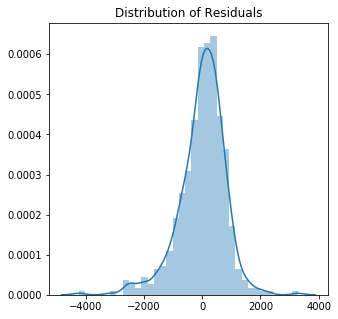

In [79]:
# Residual plot has normal distribution

plt.figure(figsize=(5,5))
train_res_sm = y_train - y_train_pred_sm
plt.title('Distribution of Residuals')
sb.distplot(train_res_sm)
plt.show();

- Residual plot looks good, it has normal shape, residuals are nornally distributed

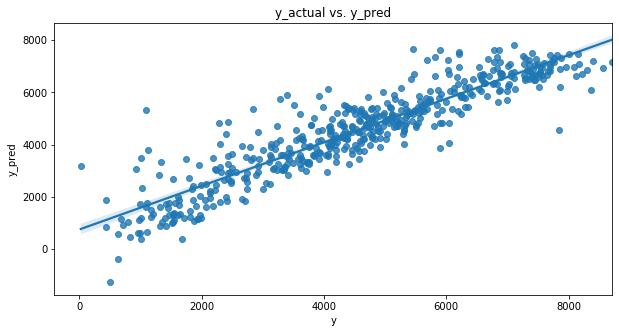

In [80]:
# Plotting y_train and y_pred to understand the spread

plt.figure(figsize=(10,5))
sb.regplot(y_train,y_train_pred_sm)
plt.title('y_actual vs. y_pred')
plt.xlabel('y')
plt.ylabel('y_pred')

plt.show();

- The y_train and y_train_pred_sm show linear relationship, most of the points are close to each other in a straight line, except for some data points

# Predicting the y_test values

In [81]:
X_test_scaled.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,LightRain_LightSnow,Mist_Cloudy,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
175,0,0,0,28.495000,32.16565,48.3333,14.041257,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
306,0,0,1,16.741653,20.29605,70.2083,9.166739,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
631,1,0,1,21.080847,25.12565,49.2917,9.541068,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
107,0,0,1,21.012500,25.15730,54.2500,10.958989,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
339,0,0,1,18.962500,22.82000,94.9583,15.583061,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [82]:
X_test_scaled.shape

(219, 29)

In [83]:
# Performing Min Max scaling on 'X_test_scaled'

X_test_scaled[scale_vars] = scaler.transform(X_test_scaled[scale_vars])

In [84]:
X_train_scaled.columns

Index(['yr', 'atemp', 'windspeed', 'spring', 'LightRain_LightSnow',
       'Mist_Cloudy', 'Oct', 'Sep', 'Mon', 'Sun'],
      dtype='object')

In [85]:
# Selecting the necessary variables and making respective changes
# Check head() of the test dataset after changes

X_test = X_test_scaled[['yr', 'atemp', 'windspeed', 'spring', 'LightRain_LightSnow',
       'Mist_Cloudy', 'Oct', 'Sep', 'Mon', 'Sun']]
X_test.head()

,yr,atemp,windspeed,spring,LightRain_LightSnow,Mist_Cloudy,Oct,Sep,Mon,Sun
175,0,0.740646,0.385880,0,0,0,0,0,0,0
306,0,0.429037,0.235894,0,0,0,0,0,0,0
631,1,0.555827,0.247412,0,0,0,0,1,1,0
107,0,0.556658,0.291040,0,0,0,0,0,1,0
339,0,0.495297,0.433320,0,1,0,0,0,0,0


In [86]:
# add constant

X_test_plus = sm.add_constant(X_test)

In [87]:
# Predicting y_test

y_test_pred_sm = lr_model_sm.predict(X_test_plus)
y_test_pred_sm.head()

175    4867.182490
306    3934.755805
631    6532.534734
107    3874.862439
339    1246.281182
dtype: float64

In [88]:
# Checking r-square of the predicted y values, 82% of the variance has been explained-
# by this model on X_test set

r2_score(y_test,y_test_pred_sm)

0.8037024862249631

In [89]:
Adj_Rsquare_test = 1 - (((1-0.8037024862249631)*218)/(219-10-1))
Adj_Rsquare_test

0.7942651057550094

# Conclusion

- The final selected variables which can be useful for predicting 'cnt' are **['yr', 'atemp', 'windspeed', 'spring', 'LightRain_LightSnow','Mist_Cloudy', 'Oct', 'Sep', 'Mon', 'Sun']**
- P-values of all the independent variables are 0.00
- F-static is significant
- Adjusted R-square of train set is 0.831
- Prediction score R-square is 0.8037
- Prediction score Adjusted R-square is 0.7942